In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import random
import cv2
from sklearn.manifold import TSNE
from tqdm import tqdm

Read csv file 

In [2]:
data_label = pd.read_csv('label.csv')
labels = data_label.iloc[:,2:]
labels.head()

pic  label  type
0  azurlane_0.jpg      0     0
1  azurlane_1.jpg      0     0
2  azurlane_2.jpg      0     0
3  azurlane_3.jpg      1     0
4  azurlane_4.jpg      1     0

Read images and print them randomly

In [3]:
pic_dir = './pic'
path = os.listdir(pic_dir)
path.sort()
print(f'Number of images in {pic_dir} is {len(path)}')

Number of images in ./pic is 670


(192, 144, 3)

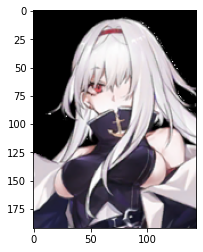

In [4]:
i = random.randrange(0,670)
imgpath = os.path.join(pic_dir, path[i])
img = cv2.imread(imgpath)
img = cv2.resize(img, (144,192))
#img = img[...,::-1]
img = np.dstack([img[:,:,2], img[:,:,1], img[:,:,0]])

plt.imshow(img)
img.shape

Print images with thier labels.

In [5]:
img_path = []
for i in range(len(path)):
    img_path.append(os.path.join(pic_dir, path[i]))

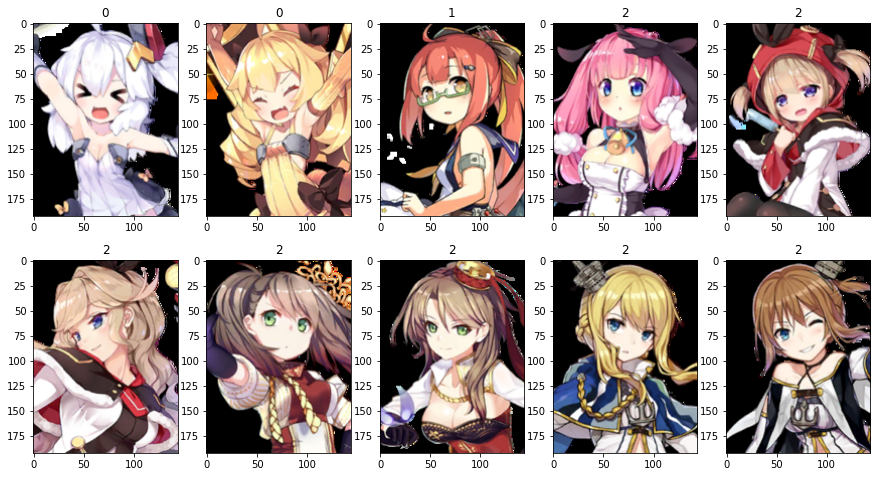

In [6]:
fig, axes = plt.subplots(2, 5, figsize = (15,8))
axes = axes.flatten()
for i in range(10):
    plt.sca(axes[i])
    plt.title(int(labels[labels['pic'] == path[i]].label))
    plt.imshow(cv2.imread(img_path[i])[...,::-1])

Adjust images and prepare for TSNE

In [7]:
data = []
for i in range(len(img_path)):
    img = cv2.imread(img_path[i])
    img = cv2.resize(img, (144,144))
    l = int(labels[labels['pic'] == path[i]].label)
    t = int(labels[labels['pic'] == path[i]].type)
    data.append([img.flatten(), l, t])

In [8]:
images, labels, types = zip(*data)

TSNE

In [9]:
features = np.array(images)
tsne = TSNE(n_components=2, learning_rate=10, perplexity=30, angle=0.2, verbose=2, random_state=42).fit_transform(features)

/Users/mingtsung/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 670 samples in 0.019s...
[t-SNE] Computed neighbors for 670 samples in 1.921s...
[t-SNE] Computed conditional probabilities for sample 670 / 670
[t-SNE] Mean sigma: 5484.274789
[t-SNE] Computed conditional probabilities in 0.027s
[t-SNE] Iteration 50: error = 62.5220108, gradient norm = 0.0000004 (50 iterations in 0.136s)
[t-SNE] Iteration 100: error = 62.5217514, gradient norm = 0.0000000 (50 iterations in 0.135s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 100 iterations with early exaggeration: 62.521751
[t-SNE] Iteration 150: error = 2.6825054, gradient norm = 0.0177848 (50 iterations in 0.103s)
[t-SNE] Iteration 200: error = 1.6641974, gradient norm = 0.0019231 (50 iterations in 0.124s)
[t-SNE] Iteration 250: error = 1.6199710, gradient norm = 0.0008986 (50 iterations in 0.131s)
[t-SNE] Iteration 300: error = 1.6016331, gradient norm = 0.0004905 (50 iterations in 0.134s)
[t-SNE] Iter

In [10]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

In [11]:
df_tsne = pd.DataFrame(list(zip(tx, ty, labels, types)), columns=['tx','ty', 'labels', 'types'])

In [12]:
df_tsne.head()

tx        ty  labels  types
0  0.008479  0.485782       0      0
1  0.011295  0.491025       0      0
2  0.616183  0.613375       1      0
3  0.274981  0.353478       2      2
4  0.877401  0.819514       2      2

Change labels and types to their real names

In [13]:
labels_map = {0:'Universal', 1:'Eagle Union', 2:'Royal Navy', 3:'Sakura Empire', 4:'Iron Blood', 5:'Dragon Empery', 
              6:'Northern Parliament',7:'Iris Libre', 8:'Vichya Dominion', 9:'Sardegna Empire', 10:'Tempesta',
              11:'META', 12:'The Idolmaster', 13:'SSSS', 14:'Neptunia', 15:'Utawarerumono', 
              16:'KizunaAI', 17:'Hololive', 18:'Bilibili', 19:'Venus Vacation'}

In [14]:
types_map = {0:'Destroyer', 1:'Light Cruiser', 2:'Heavy Cruiser', 3:'Battleship', 4:'Aircraft',
            5:'Repair Ship', 6:'Monitor', 7:'Submarine', 8:'Munition Ship', 9:'Large Cruiser', 10:'Sailing Frigate',
            11:'DDGMunition Ship', 12:'Aviation Battleship'}

In [15]:
df_tsne['faction'] = df_tsne['labels'].map(labels_map)
df_tsne['ship_type'] = df_tsne['types'].map(types_map)

In [16]:
df_tsne

tx        ty  labels  types      faction      ship_type
0    0.008479  0.485782       0      0    Universal      Destroyer
1    0.011295  0.491025       0      0    Universal      Destroyer
2    0.616183  0.613375       1      0  Eagle Union      Destroyer
3    0.274981  0.353478       2      2   Royal Navy  Heavy Cruiser
4    0.877401  0.819514       2      2   Royal Navy  Heavy Cruiser
..        ...       ...     ...    ...          ...            ...
665  0.419234  0.763191       2      1   Royal Navy  Light Cruiser
666  0.359372  0.174239       2      1   Royal Navy  Light Cruiser
667  0.835605  0.639424       2      2   Royal Navy  Heavy Cruiser
668  0.472249  0.777032       2      2   Royal Navy  Heavy Cruiser
669  0.575610  0.432315       2      2   Royal Navy  Heavy Cruiser

[670 rows x 6 columns]

Only include the main characters (there are cooperate characters that came from other games)

In [17]:
df_tsne_normal = df_tsne[(df_tsne['labels'] < 5) & (df_tsne['labels'] > 0) & (df_tsne['types'] < 5)]

TSNE visualization

In [18]:
fig, axes = plt.subplots(2,1, figsize=(12,12))
axes = axes.flatten()
sns.scatterplot(data=df_tsne_normal, x='tx', y='ty', hue='faction', ax=axes[0])
axes[0].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
axes[0].set_title('faction')
sns.scatterplot(data=df_tsne_normal, x='tx', y='ty', hue='ship_type', ax=axes[1])
axes[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
axes[1].set_title('ship type')

Text(0.5, 1.0, 'ship type')

Print out the scatter plot with images

/var/folders/n9/t_j1751j2636q1vf1wsyppsw0000gn/T/ipykernel_71190/3560397793.py:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)


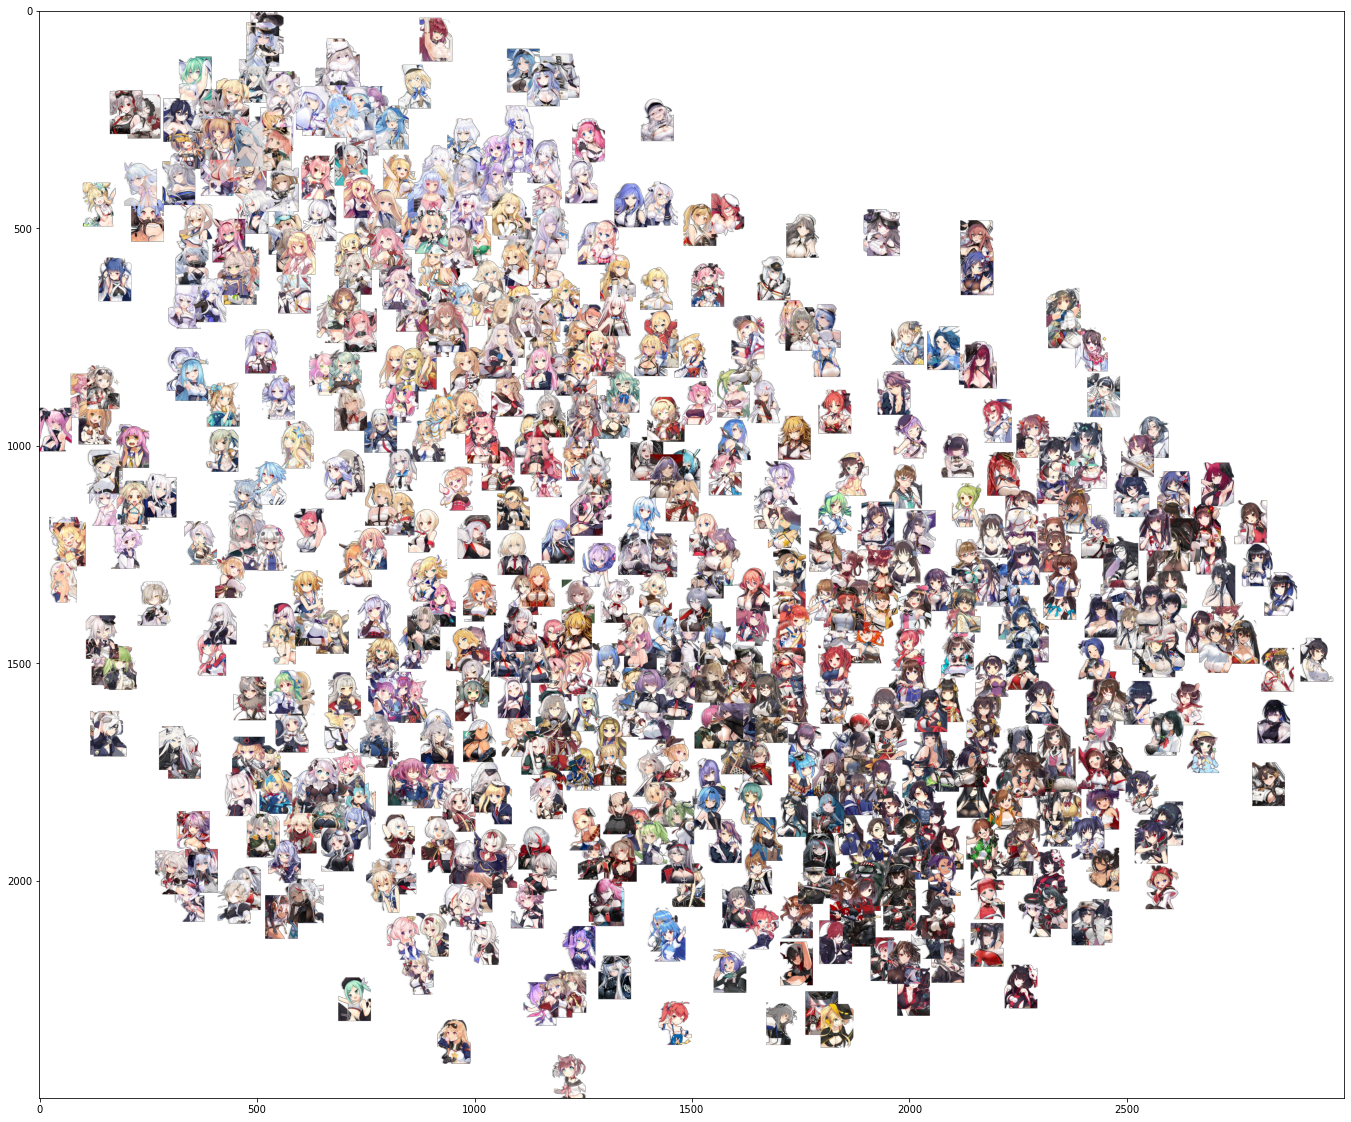

In [19]:
width = 3000
height = 2500
max_dim = 100

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(img_path, tx, ty):
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

plt.figure(figsize = (25,20))
plt.imshow(full_image)

Conclusion:

From the first scatter plot, no difference between each faction or ship type.

The second scatter plot shows that hair and clothes play an important role. The x-axis seems to be hair color(The darker the hair, the farther to the right we place it.) The y-axis seems to be the clothes' color(The darker the clothes, the lower we place it.)

In [20]:
import umap

In [21]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(features)

In [22]:
e1 = (embedding[:,0]-np.min(embedding[:,0])) / (np.max(embedding[:,0]) - np.min(embedding[:,0]))
e2 = (embedding[:,1]-np.min(embedding[:,1])) / (np.max(embedding[:,1]) - np.min(embedding[:,1]))

In [23]:
df_umap = pd.DataFrame(list(zip(e1, e2, labels, types)), columns=['e1','e2', 'labels', 'types'])

In [24]:
df_umap['faction'] = df_umap['labels'].map(labels_map)
df_umap['ship_type'] = df_umap['types'].map(types_map)

In [25]:
df_umap_normal = df_umap[(df_umap['labels'] < 5) & (df_umap['labels'] > 0) & (df_umap['types'] < 5)]

In [26]:
df_umap_normal

e1        e2  labels  types      faction      ship_type
2    0.686172  0.174869       1      0  Eagle Union      Destroyer
3    0.358390  0.709515       2      2   Royal Navy  Heavy Cruiser
4    0.918178  0.198670       2      2   Royal Navy  Heavy Cruiser
5    0.450880  0.820526       2      2   Royal Navy  Heavy Cruiser
6    0.706567  0.139370       2      2   Royal Navy  Heavy Cruiser
..        ...       ...     ...    ...          ...            ...
665  0.541645  0.036758       2      1   Royal Navy  Light Cruiser
666  0.241976  0.970912       2      1   Royal Navy  Light Cruiser
667  0.925340  0.482825       2      2   Royal Navy  Heavy Cruiser
668  0.657709  0.103621       2      2   Royal Navy  Heavy Cruiser
669  0.528923  0.610020       2      2   Royal Navy  Heavy Cruiser

[468 rows x 6 columns]

Text(0.5, 1.0, 'ship type')

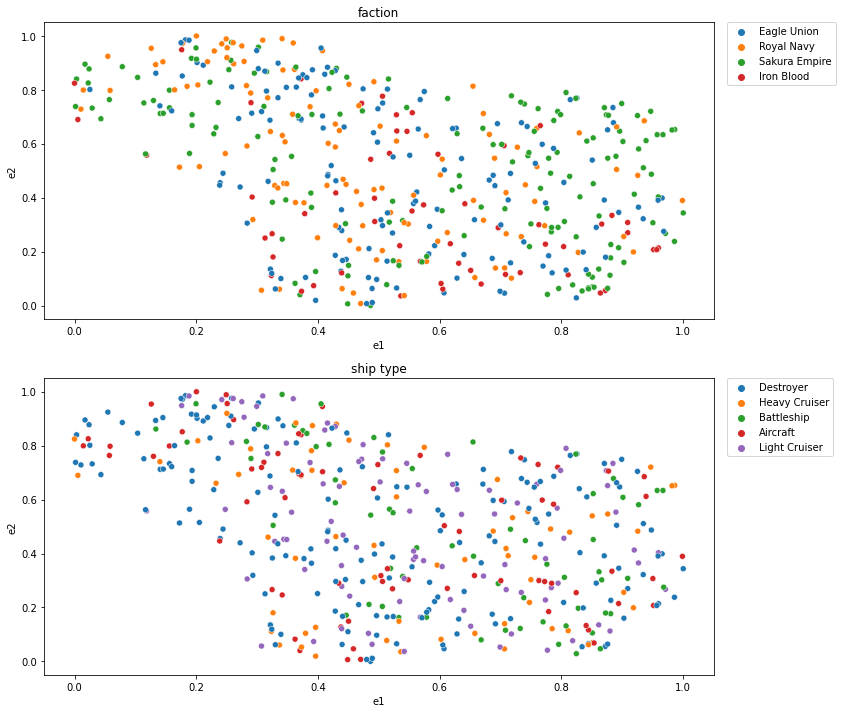

In [27]:
fig, axes = plt.subplots(2,1, figsize=(12,12))
axes = axes.flatten()
sns.scatterplot(data=df_umap_normal, x='e1', y='e2', hue='faction', ax=axes[0])
axes[0].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
axes[0].set_title('faction')
sns.scatterplot(data=df_umap_normal, x='e1', y='e2', hue='ship_type', ax=axes[1])
axes[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
axes[1].set_title('ship type')

/var/folders/n9/t_j1751j2636q1vf1wsyppsw0000gn/T/ipykernel_71190/3029628773.py:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)


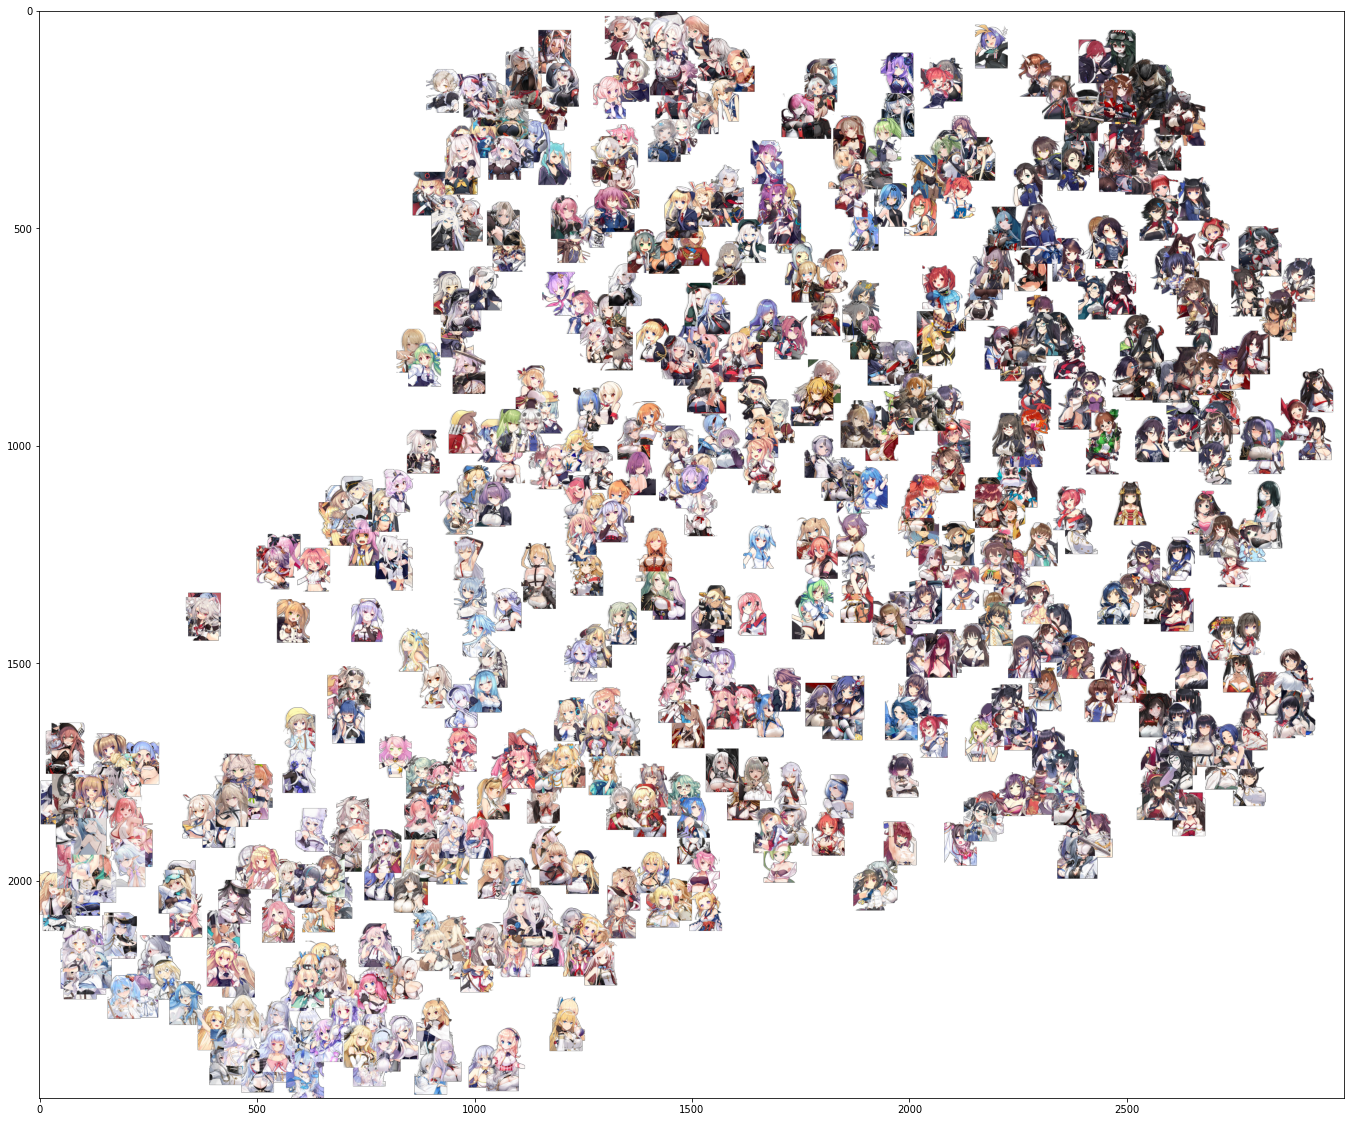

In [28]:
width = 3000
height = 2500
max_dim = 100

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(img_path, e1, e2):
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

plt.figure(figsize = (25,20))
plt.imshow(full_image)

Conclusion:

Same as tSNE, no difference between each faction or ship type in the first scatter plot.

The second scatter plot shows that hair and clothes play an important role. The x-axis seems to be hair color(The darker the hair, the farther to the right we place it.) The y-axis seems to be the clothes' color(The darker the clothes, the higher we place it.)

Future improvement:

Combine Convolutional Neural Networks to help visualize.